<small><small><i>
All the IPython Notebooks in this **Python Decision Tree and Random Forest** series by Dr. Milaan Parmar are available @ **[GitHub](https://github.com/milaan9/90_Python_Examples)**
</i></small></small>

# Visualize a Decision Tree on Iris dataset

In ‘Iris’ dataset we have to create the Decision Tree classifier and visualize it graphically. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

## Train Decision Tree on Classification Task

We'll train a **`DecisionTreeClassifier`** on **Iris** dataset and we'll also use default hyper-parameters for the classifier.

<div>
<img src="img/iris.png" width="500"/>
</div>

<div>
<img src="img/irisFlow.png" width="525"/>
</div>

## Decision Tree on Iris Dataset

In [1]:
pip install pandas

     |████████████████████████████████| 11.3 MB 4.8 MB/s eta 0:00:01
     |████████████████████████████████| 15.7 MB 72.5 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib

     |████████████████████████████████| 10.3 MB 4.7 MB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 59.9 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 66.8 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install sklearn

     |████████████████████████████████| 22.3 MB 4.7 MB/s eta 0:00:01
     |████████████████████████████████| 28.5 MB 51.8 MB/s eta 0:00:01
     |████████████████████████████████| 303 kB 69.7 MB/s eta 0:00:01
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=8218ae814859a38748df1771050c3ff14771a2face570f7a0362d90dbb06949b
  Stored in directory: /home/jovyan/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install seaborn

     |████████████████████████████████| 292 kB 4.6 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [5]:
# Importing libraries in Python

import pandas as pd
from matplotlib import pyplot as plt
from sklearn import datasets
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
import seaborn as sns

In [6]:
#Filtering the warnings

import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [7]:
iris = datasets.load_iris()
print("Iris dataset loaded successfully")

Iris dataset loaded successfully


In [8]:
data=pd.DataFrame(iris['data'],columns=["Petal length","Petal Width","Sepal Length","Sepal Width"])

Creating a new column “Species” with target values from the dataset, I am using lambda function to apply a function so as to convert the target values which are 0,1,2 to the corresponding target values(“setosa”,”versicolor”,”virginica”)

In [9]:
data['Species']=iris['target']

In [10]:
data['Species']=data['Species'].apply(lambda x: iris['target_names'][x])

## Explore the dataset

In [11]:
data.head()

,Petal length,Petal Width,Sepal Length,Sepal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [12]:
data.isnull().any()

Petal length    False
Petal Width     False
Sepal Length    False
Sepal Width     False
Species         False
dtype: bool

In [13]:
data.dtypes

Petal length    float64
Petal Width     float64
Sepal Length    float64
Sepal Width     float64
Species          object
dtype: object

In [14]:
data.describe()

,Petal length,Petal Width,Sepal Length,Sepal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Perform pair plotting to view relationship between the features present in the data

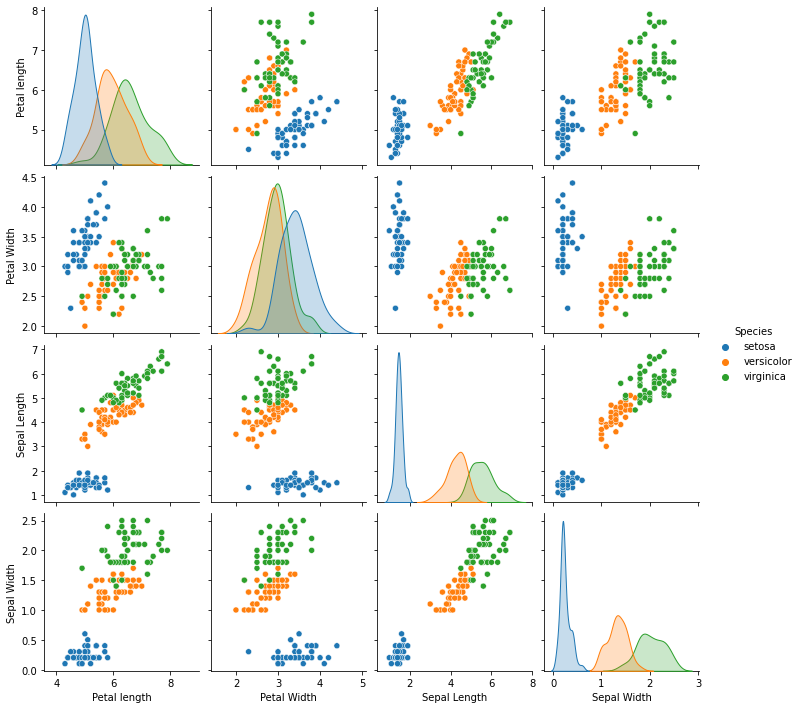

In [15]:
sns.pairplot(data, hue='Species')
plt.show()

We can easily observe that "iris-setosa" makes a distinctive cluster in every parameter, while the other two species are overlapping a bit on each other

## Let's check correlation using heatmap

[]

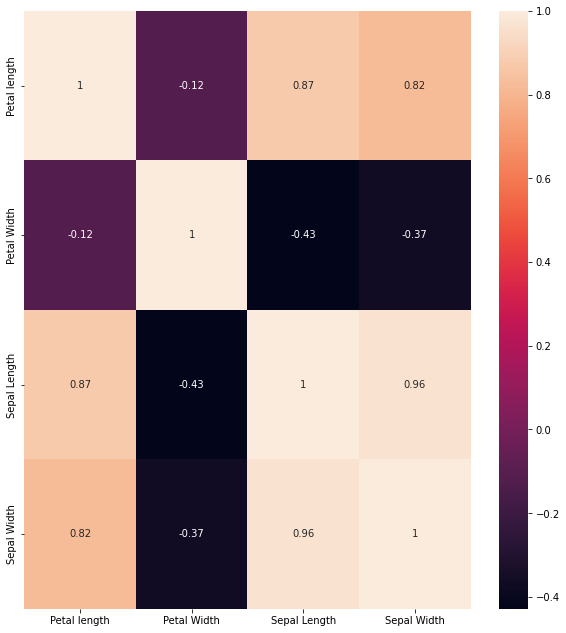

In [16]:
plt.figure(figsize=(10,11))
sns.heatmap(data.corr(),annot=True)
plt.plot()

Observations made -

1. Petal length is highly related to petal width.
2. Sepal lenth is not related sepal width

## Let's see that how the categorical feature “Species” is distributed with all other four input variables.

<AxesSubplot:xlabel='Species', ylabel='Petal Width'>

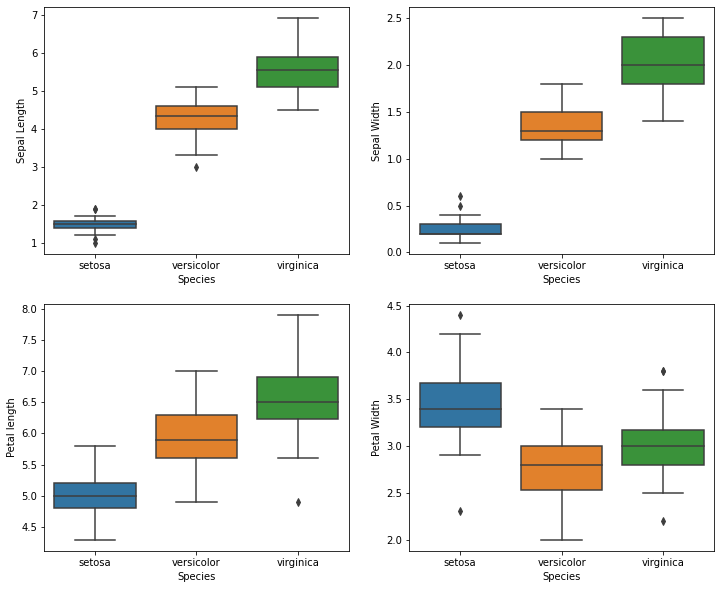

In [17]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(x="Species",y="Sepal Length",data=data)
plt.subplot(2,2,2)
sns.boxplot(x="Species",y="Sepal Width",data=data)
plt.subplot(2,2,3)
sns.boxplot(x="Species",y="Petal length",data=data)
plt.subplot(2,2,4)
sns.boxplot(x="Species",y="Petal Width",data=data)

## Preparing the data for classification Model Building

### Split data into train and test set

In [18]:
X = data[["Sepal Length","Sepal Width","Petal length","Petal Width"]].values
Y = data['Species'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.9, random_state=1)

### Train the decision tree classifier

In [19]:
#scikit learn decision tree model training 
DT = tree.DecisionTreeClassifier()
DT = DT.fit(X_train, Y_train)

### Test the model trained on test set

In [20]:
DT.predict(X_test)
prediction = DT.predict(X_test)

In [21]:
prediction = DT.predict(X_test)
prediction

array(['setosa', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor'],
      dtype=object)

### Perform Evaluation on Test set

In [22]:
# evaluation for multi class classification
print(classification_report(Y_test, prediction))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         5
  versicolor       1.00      1.00      1.00         6
   virginica       1.00      1.00      1.00         4

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



## Let's check accuracy of the model build

In [23]:
DT.score(X_test, Y_test)

1.0

In [24]:
#prediction
Y_pred = DT.predict(X_test)

In [25]:
#Accuracy
from sklearn import metrics
print('Accuracy Score:', metrics.accuracy_score(Y_test, Y_pred))

Accuracy Score: 1.0


### Plot Confusion Matrix

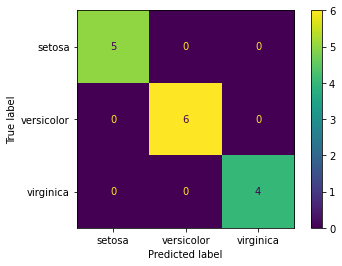

In [26]:
plot_confusion_matrix(DT, X_test, Y_test)

### Visualize the Decision Tree

In [27]:
!pip install pydotplus

     |████████████████████████████████| 278 kB 4.6 MB/s eta 0:00:01
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24566 sha256=3f45aa4d7549a47e9e9ac5f0c40a38936342debdbc83799463d1e6b9a32306c3
  Stored in directory: /home/jovyan/.cache/pip/wheels/1e/7b/04/7387cf6cc9e48b4a96e361b0be812f0708b394b821bf8c9c50
Successfully built pydotplus


In [28]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [29]:
conda install graphviz

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 4.10.3

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /srv/conda/envs/notebook

  added / updated specs:
    - graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    atk-1.0-2.36.0             |       h3371d22_4         560 KB  conda-forge
    cairo-1.16.0               |    h6cf1ce9_1008         1.5 MB  conda-forge
    expat-2.4.1                |       h9c3ff4c_0         182 KB  conda-forge
    font-ttf-dejavu-sans-mono-2.37|       hab24e00_0         388 KB  conda-forge
    font-ttf-inconsolata-3.000 |       h77eed37_0          94 KB  conda-forge
    font-ttf-source-code-pro-2.038|       h77eed37_0         684 KB  conda-forge
    font-ttf-ubuntu-0.83       |       hab24e00_0         1.9 MB  conda-f

xorg-libxau-1.0.9    | 13 KB     | ##################################### | 100% 
jbig-2.1             | 43 KB     | ##################################### | 100% 
xorg-libxext-1.3.4   | 54 KB     | ##################################### | 100% 
zstd-1.5.0           | 490 KB    | ##################################### | 100% 
pthread-stubs-0.4    | 5 KB      | ##################################### | 100% 
font-ttf-source-code | 684 KB    | ##################################### | 100% 
xorg-xproto-7.0.31   | 73 KB     | ##################################### | 100% 
gts-0.7.6            | 411 KB    | ##################################### | 100% 
harfbuzz-2.9.0       | 1.9 MB    | ##################################### | 100% 
jpeg-9d              | 264 KB    | ##################################### | 100% 
libgd-2.3.2          | 299 KB    | ##################################### | 100% 
atk-1.0-2.36.0       | 560 KB    | ##################################### | 100% 
xorg-xextproto-7.3.0 | 28 KB

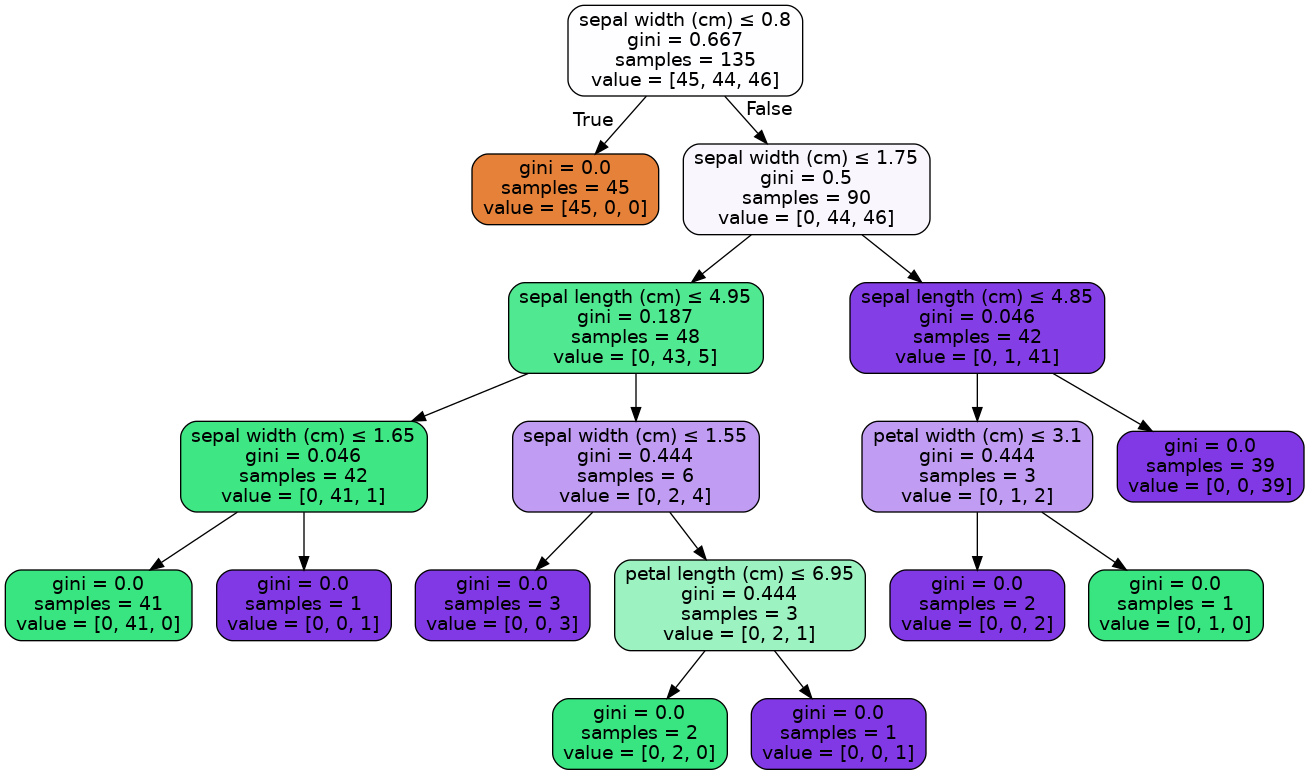

In [30]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

# Import necessary libraries for graph viz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the graph
dot_data = StringIO()
export_graphviz(DT, out_file=dot_data, feature_names=iris.feature_names,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Now feeding any new/test data to this classifer and it would be able to predict the right class accordingly.

In [31]:
DT.predict([[4.8, 2.9, 1.3, 0.2]])

array(['virginica'], dtype=object)

In [32]:
DT.predict([[3.5, 1.9, 5.2, 2.4]])

array(['virginica'], dtype=object)

In [33]:
DT.predict([[4.6, 2.9, 3.6, 5.9]])

array(['versicolor'], dtype=object)